# TP Calcul de racines

Durant ce TP, nous nous intéressons aux méthodes numériques pour déterminer les zéros de fonctions.

## Recherche de minimum

L'une des applications de l'obtention des zéros est la détermination d'extremums locaux. Dans cette partie, nous nous intéresserons seulement aux minimums.

### Question
1. Afficher le graphique de la fonction $f(x)=2x^6-12x^5+15x^4+20x^3-36x^2+4$ et trouver un intervalle qui permette de voir tous ses minimums locaux. *Vous pourrez utiliser la fonction d'interaction vue au TP1* `@interact`.
1. Afficher à la fois le graphe de $f$ et de sa dérivée. Que constatez-vous pour les minimums locaux de $f$?

In [1]:
var('x')
f(x) = 2*x**6 - 12*x**5 + 15*x**4 + 20*x**3 - 36*x**2 + 4


@interact
def _(xmin = slider([-10..0]), xmax = slider([0..10])):
    show(plot(f(x), xmin, xmax))

Widget Javascript not detected.  It may not be installed or enabled properly.


In [2]:
#entre -2 et 4
fd = derivative(f, x)
show(fd)

x |--> 12*x^5 - 60*x^4 + 60*x^3 + 60*x^2 - 72*x

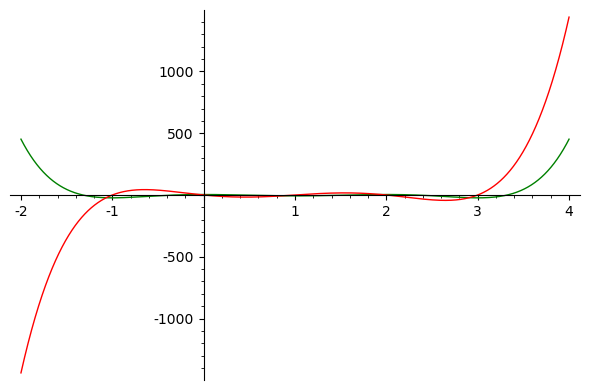

In [3]:
plot(f, -2, 4, color="green") + plot(fd, -2, 4, color="red")
#min locaux de f sont là où la dérivée s'annule

### Question

Tout extremum local d'une fonction dérivable $f$ correspond à une racine de sa dérivée. Nous allons utiliser cette propriété pour déterminer  les minimums de f.

1. En utilisant la méthode `find_root` sur des intervalles adaptés calculer chacune des racines de $f'$ qui correspond à un minimum de $f$.
1. Evaluer $f$ et $f'$ en ces points. Que constatez vous et que pouvez-vous conclure sur `find_root` ?
1. Trouver d'autres intervalles de recherches de telles sorte que les évaluations de $f$ diffèrent. 

In [4]:
roots_fd = []
roots_fd.append(find_root(fd, -1.5, -0.5))
roots_fd.append(find_root(fd, -0.5, 0.5))
roots_fd.append(find_root(fd, 0.5, 1.5))
roots_fd.append(find_root(fd, 1.5, 2.5))
roots_fd.append(find_root(fd, 2.5, 3.5))
show(roots_fd)

[-0.9999999999999882,
 -2.2690246355019664e-14,
 1.0,
 2.000000000000022,
 2.999999999999989]

In [5]:
for root in roots_fd:
    show("root:", root)
    show("f(root):", f(root))
    show("f'(root):", fd(root))
#find_root n'est pas exact mais suffisant pour nos recherches
#nous permet de trouver des min candidats

'root:' -0.9999999999999882

'f(root):' -23.00000000000001

"f'(root):" 3.3786307085392764e-12

'root:' -2.2690246355019664e-14

'f(root):' 4.0

"f'(root):" 1.6336977375614467e-12

'root:' 1.0

'f(root):' -7.0

"f'(root):" 0.0

'root:' 2.000000000000022

'f(root):' 4.000000000000057

"f'(root):" -1.5347723092418164e-12

'root:' 2.999999999999989

'f(root):' -23.0

"f'(root):" -2.7284841053187847e-12

In [6]:
find_root(fd, -5,5)

-0.9999999999999999

La méthode `find_root`renvoie une approximation numérique d'une racine de la fonction comprise dans l'intervalle donné en paramètres. Ainsi il peut y avoir une marge d'erreur $\epsilon$ entre la véritable racine $r$ et la valeur $\overline{r}= r +\epsilon$ renvoyée par la méthode. Cette erreur se propage ensuite dans les calculs réalisés à partir de $\overline{r}$.

Par défaut, la méthode `roots` cherche à calculer toutes les racines de manière exacte dans l'anneau symbolique `SR`. Cependant cette méthode peut échouer à calculer certaines racines. 

### Question
1. Tester la méthode `roots` pour la fonction $h(x)=x^5 + x^3 + x + 1$.
1. En utilisant la méthode `roots`, calculer les racines de $f'$ pour la fonction $f$ de la question précédente.
1. S'agit-il à chaque fois d'un minimum local de $f$ ? Sont-ils tous présents ? *Vous afficherez la fonction et les points correspondants aux racines trouvées*. 
1. Écrire un programme qui calcule les minimums locaux d'une fonction polynomiale lorsque la méthode `roots` trouve bien toutes les racines de sa dérivée.
1. Écrire un programme qui affiche une fonction et ses minimum locaux. 
1. Utiliser la fonction $f$ et son affichage pour vérifier vos calculs. 

In [7]:
h(x) = x**5 + x**3 + x + 1
hd = derivative(h)
hd.roots()

[(-sqrt(1/10*I*sqrt(11) - 3/10), 1),
 (sqrt(1/10*I*sqrt(11) - 3/10), 1),
 (-sqrt(-1/10*I*sqrt(11) - 3/10), 1),
 (sqrt(-1/10*I*sqrt(11) - 3/10), 1)]

In [8]:
root = [r[0] for r in fd.roots()]

In [9]:
for r in root:
    show("root:", r)
    show("f(root):", f(r))

'root:' 3

'f(root):' -23

'root:' -1

'f(root):' -23

'root:' 1

'f(root):' -7

'root:' 2

'f(root):' 4

'root:' 0

'f(root):' 4

In [10]:
def localMin(func):
    funcD = derivative(func)
    funcD = funcD.factor()
    try:
        r = funcD.roots()
        r = [(roo[0], func(roo[0])) for roo in r]
        realr = []
        for roo in r:
            e = 0.0001
            if funcD(roo[0]+e) > 0:
                realr.append(roo)
        if realr == []:
            r = funcD.roots(ring=QQbar)
            r2 = []
            for roo in r:
                c = CC(roo[0])
                if c.imag() == 0:
                    r2.append((RR(c), RR(func(c))))
            for roo in r2:
                e = 0.0001
                if funcD(roo[0]+e) > 0:
                    realr.append(roo)
        return realr
    except:
        print("pas de racines trouvées")
        return None

In [11]:
def plotLocalMin(func):
    pts = localMin(func)
    if pts == None: 
        print("pas de racines")
    elif pts == []:
        print("racines vides???")
    else:
        xmin = min([x[0] for x in pts])-1
        xmax = max([x[0] for x in pts])+1
        p1 = plot(func, xmin, xmax, color="green")
        for p in pts:
            p1 += point2d(p, color="red", size=20)
        show(p1)

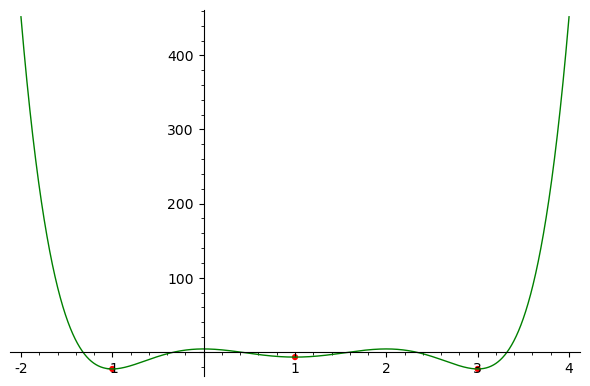

In [12]:
plotLocalMin(f)

### Question
1. Tester aussi votre programme sur sur les fonctions suivantes :

    -$f_1(x)=15x^6 - 51x^5 - 60x^4 + 185x^3 + 60x^2 - 90x-17$
    
    -$f_2(x)=3x^5 - \frac{45}{8}x^4 + \frac{25}{2}x^3 - \frac{45}{2}x^2 + 15x+42$
    
    -$f_3(x)=-5x^6 - 42x^5 - 15x^4 + 640x^3 + 1440x^2 -32$
    
    -$f_4(x)=-x^7 + \frac{1}{3}x^6 - \frac{7}{5}x^5 + \frac{1}{2}x^4 - \frac{7}{3}x^3 - \frac{5}{2}x^2 + 2x$
1. Utiliser l'affichage des fonctions pour vérifier vos réponses et adapter votre programme si besoin. *La méthode `factor` appliquée à la dérivée peut aider à comprendre ce qui se passe.*


In [13]:
f1(x) = 15*x**6 - 51*x**5 - 60*x**4 + 185*x**3 + 60*x**2 - 90*x - 17
f2(x) = 3*x**5 - (45/8)*x**4 + (25/2)*x**3 - (45/2)*x**2 + 15*x + 42
f3(x) = -5*x**6 - 42*x**5 - 15*x**4 + 640*x**3 + 1440*x**2 - 32
f4(x) = -x**7 + (1/3)*x**6 - (7/5)*x**5 + (1/2)*x**4 - (7/3)*x**3 - (5/2)*x**2 + 2*x

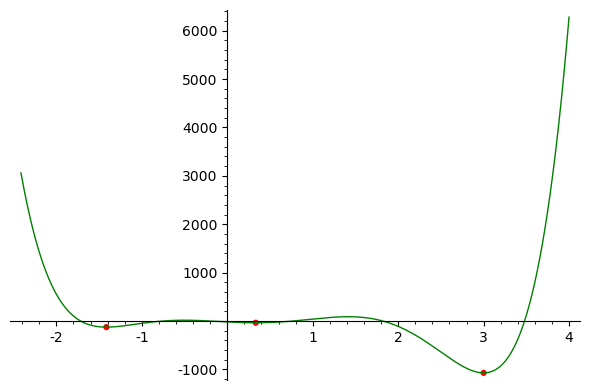

In [14]:
plotLocalMin(f1)

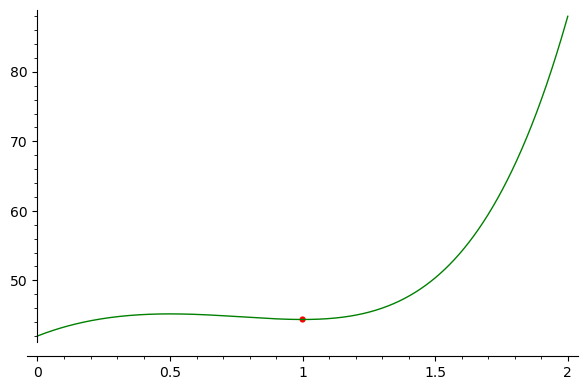

In [15]:
plotLocalMin(f2)

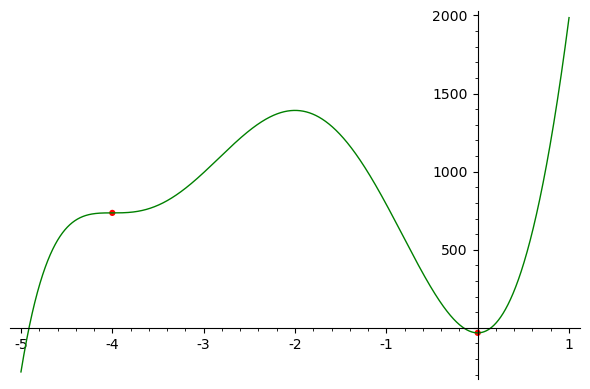

In [16]:
plotLocalMin(f3)

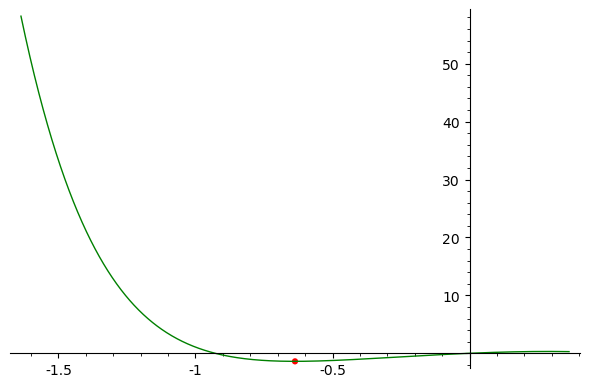

In [17]:
plotLocalMin(f4)

In [18]:
f4D = derivative(f4)
f4D = f4D.factor()
f4D

x |--> -(x^5 + x^3 + x + 1)*(7*x - 2)

In [19]:
f4D.roots()
fA(x) = 7*x - 2
fB(x) = x**5 + x**3 + x + 1
r = f4D.roots(ring=QQbar)
rr = []
for roo in r:
    c = CC(roo[0])
    show(c.imag() == 0)
    show(c)

True

-0.636882916801845

True

0.285714285714286

False

-0.389287331403393 - 1.07067577489051*I

False

-0.389287331403393 + 1.07067577489051*I

False

0.707728789804316 - 0.841954854032373*I

False

0.707728789804316 + 0.841954854032373*I

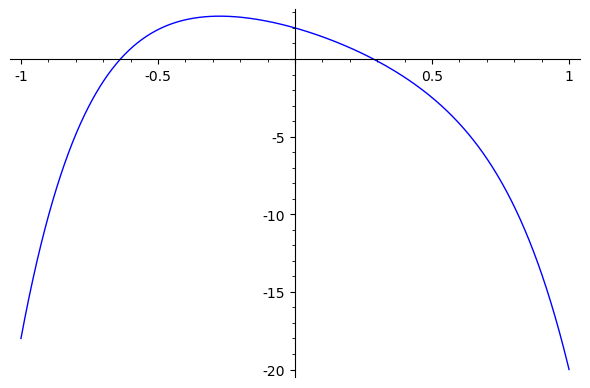

In [20]:
plot(f4D)

Dans la suite du TP, nous allons voir des méthodes pour calculer une approximation numérique $\overline{r}$ d'une racine $r$ d'une fonction à une précision voulue en réglant la taille possible de l'erreur $\epsilon$ telle que $\overline{r}=r + \epsilon$.

## Dichotomie

Cette méthode considère une fonction continue $f$ et un intervalle $[a,b]$ tel que $f(a)$ et $f(b)$ sont de signes différents ($f(a)\times f(b)<0$). Comme $f$ est continue, il existe forcément un point $x\in[a,b]$ tel que $f(x)=0$.
A chaque étape la méthode divise l'intervalle de recherche par $2$ en choisissant le sous-intervalle contenant la racine (signes des évaluations des extrémités différents). 

Quand l'intervalle est plus petit que la précision voulue tout point de cet intervalle est alors une bonne approximation de la racine. La méthode s'arrêtera avant si l'une des deux extrémités d'un intervalle est la racine.

### Question
1. Ecrire un algorithme qui prend en entrée une fonction continue, les extrémités d'un intervalle de recherche et une précision et calcule par dichotomie une approximation numérique d'une racine de la fonction dans l'intervalle à la précision donnée.
1. Utiliser votre algorithme pour calculer une approximation numérique des racines  des fonctions $f'$ et $h$ définies dans la partie précédente. *Vous utiliserez l'affichage des fonctions pour définir les intervalles de recherche de départ et vous prendrez une précision de calcul des float ($2^{-23}$)*
1. Trouver des paramètres de précision permettant d'avoir des résultats plus précis qu'avec la méthode `find_root` sur les mêmes intervalles. Pour se faire, vous devrez convertir les extrémités du premier intervalle sur des nombres réels à la précision désirée.
1. Modifier votre algorithme pour qu'il renvoie aussi le nombre d'intervalles de recherches différents utilisés.

In [21]:
def dichoRacineIntervalle(func, a, b, prec, nbInt=0):
    if b-a < prec or func(a)==0:
        return (a, nbInt)
    if func(b)==0:
        return (b, nbInt)
    m = a+(b-a)/2
    if func(m)*func(a)<0:
        return dichoRacineIntervalle(func, a, m, prec, nbInt+1)
    return dichoRacineIntervalle(func, m, b, prec,nbInt+1)

In [22]:
fD=derivative(f)
a = dichoRacineIntervalle(fD, -10,-0.5, 2**-23)
print(a[0], fD(a[0]), a[1])
a = dichoRacineIntervalle(h, -0.7.n(150),-0.6.n(150),2**-23)
print(a[0], h(a[0]).n(), a[1])

-1.00000000372529 -1.07288360950974e-6 27
-0.63688297271728515625000000000000000000000000 -1.69954819378316e-7 20


## Fausse position

Pour cette méthode plutôt que de diviser systématiquement l'intervalle en deux, les valeurs de la fonction sont utilisées en coupant l'intervalle au point $m$ qui serait une racine si la fonction était une droite. La même règle des signes permet de déterminer dans quel intervalle ($[a,m]$ ou $[m,b]$) se trouve une racine.

### Question
1. Sachant qu'une droite est une fonction de la forme $d(x)=\alpha x + \beta$. Donner une fonction qui calcule la droite passant par des points $p_1=(x_1,y_1)$ et $p_2=(x_2,y_2)$.
1. Pour $a=-0.8$, $b=0.8$ et la fonction $f'$ calculer la droite $d$ passant par $(a,f'(a))$ et $(b,f'(b))$.
1. Déterminer le point $m$ où $d$ vaut $0$ et calculer $f'(m)$. Grâce à la règle des signes déterminer dans quel sous-intevalle de $[a,b]$ se trouve une une racine de $f'$.
1. Représenter graphiquement ces différentes étapes (la fonction sur $[a,b]$, la droite, le point $m$, $f'(m)$ et le nouvel intervalle). *Utiliser des couleurs pour faciliter la lecture des graphiques.*
1. Réduiser une fois de plus l'intervalle et compléter le graphique.

In [23]:
def funcPassantParXY(p1, p2):
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    alpha = (y2-y1)/(x2-x1)
    beta = y1 - alpha*x1
    f(x) = alpha*x + beta
    return f

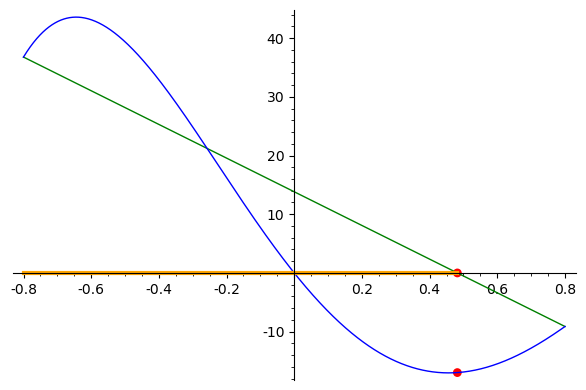

In [24]:
#plot(fD, -0.8, 0.8) + plot(funcPassantParXY((-0.8,fD(-0.8)),(0.8,fD(0.8))), -0.8,0.8)
a = -0.8
b = 0.8
d = funcPassantParXY((a,fD(a)),(b,fD(b)))
m = find_root(d, a, b)
r = fD(m)
p = plot(d,a,b,color="green") + plot(fD,a,b,color="blue")
p += line2d([(a,0),(m,0)], color="orange", thickness=3)
p += point2d((m,d(m)), color="red", size=40) + point2d((m,fD(m)), color="red", size=40)

show(p)

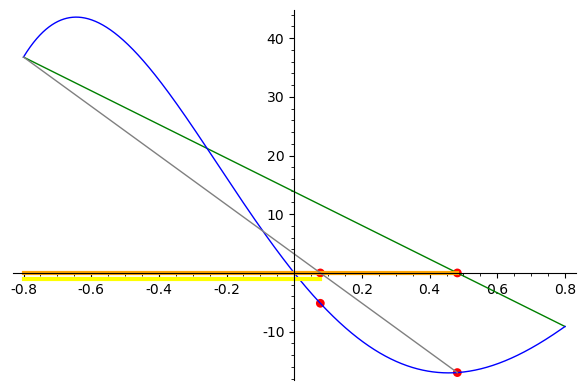

In [25]:
b = m
d = funcPassantParXY((a,fD(a)),(b,fD(b)))
m = find_root(d, a, b)
r = fD(m)
p += plot(d,a,b,color="grey")
p += point2d((m,d(m)), color="red", size=40) + point2d((m,fD(m)), color="red", size=40)
p += line2d([(a,-1),(m,-1)], color="yellow", thickness=3)
show(p)

###  Question
1. Ecrire un algorithme qui prend en entrée une fonction continue, les extrémités d'un intervalle de recherche et une précision et calcule par la fausse position une approximation numérique d'une racine de la fonction dans l'intervalle à la précision donnée.
1. Utiliser votre algorithme pour calculer une approximation numérique des racines  des fonctions $f'$ et $h$.
1. Modifier votre algorithme pour qu'il renvoie aussi le nombre d'intervalles de recherches différents utilisés.
1. Comparer le nombre d'étapes des deux méthodes dichotomie et fausse position en cherchant sur le même intervalle avec la même précision.

In [26]:
def faussePosition(func, a, b, prec, nb=0):
    if func(a)==0 or abs(func(a))<prec:
        return (a,nb)
    if func(b)==0 or abs(func(b))<prec:
        return (b,nb)
    d = funcPassantParXY((a,func(a)),(b,func(b)))
    m = find_root(d, a, b)
    if func(a)*func(m)<0:
        return faussePosition(func, a, m, prec, nb+1)
    return faussePosition(func, m, b, prec, nb+1)

In [27]:
a = faussePosition(fD, -1.5,-0.5, 2**-23)
print(a[0], fD(a[0]), a[1])
a = faussePosition(h, -0.7,-0.6, 2**-23)
print(a[0], h(a[0]), a[1])

-0.9999999997262815 7.8830924010731e-08 43
-0.6368828954453741 6.491292367516444e-08 6


In [28]:
a = faussePosition(h, -0.7,-0.6, 2**-23)
print("Méthode fausse position")
print(a[0], h(a[0]))
print("nb intervalles: ", a[1])
a =  dichoRacineIntervalle(h, -0.7,-0.6, 2**-23)
print("Méthode dichotomique")
print(a[0], h(a[0]))
print("nb intervalles: ", a[1])

Méthode fausse position
-0.6368828954453741 6.491292367516444e-08
nb intervalles:  6
Méthode dichotomique
-0.636882972717285 -1.69954819245755e-7
nb intervalles:  20


## Méthode de Newton
Dans la méthode de la fausse position la fonction est approchée par une droite passant par les deux points aux extrémités de l'intervalle.
Ici la fonction est approchée par sa tangente.
La progression ne se fait pas d'intervalle en intervalle mais de point en point. En partant d'un point $a$, le point suivant est donné par le zéro de la tangente en $a$. Quand l'écart entre deux points consécutifs est inférieur à la précision, on peut renvoyer le dernier point calculé.

### Question
1. Ecrire une fonction calculant la tangente à une fonction $g$ en un point $a$. *Il s'agit de la droite passant par le point $(a,g(a))$ et de pente $g'(a)$.*
1. Pour la fonction $h$, avec $a=-1.2$, calculer la tangente $T_a$ à $h$ en $a$ et représenter sur le même graphique $h$ et sa tangente en $a$.
1. Trouver le zéro de la tangente $T_a$, calculer la tangente à $h$ en ce point. Compléter le graphique. *Le zéro peut aussi être calculer directement sans calculer la tangente*
1. Reproduire cette étape jusqu'à avoir visuellement l'impression qu'une tangente et la courbe ont le même zéro.

In [29]:
def tangente(func, pt):
    p = func(pt)
    funcD = derivative(func)
    slope = funcD(pt)
    tangente(x) = slope*(x-pt)+p
    return tangente

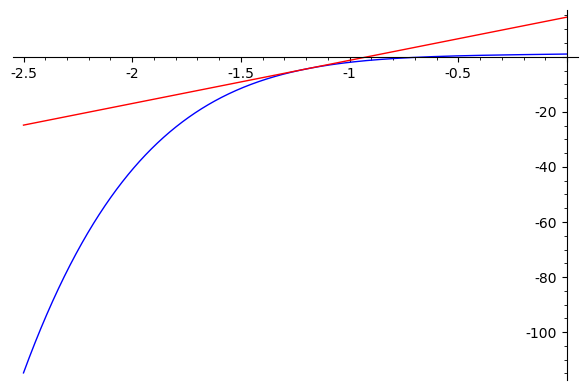

In [39]:
a = -1.2
tanH = tangente(h,a)
p = plot(h, -2.5, 0) + plot(tanH, -2.5, 0, color="red")
show(p)

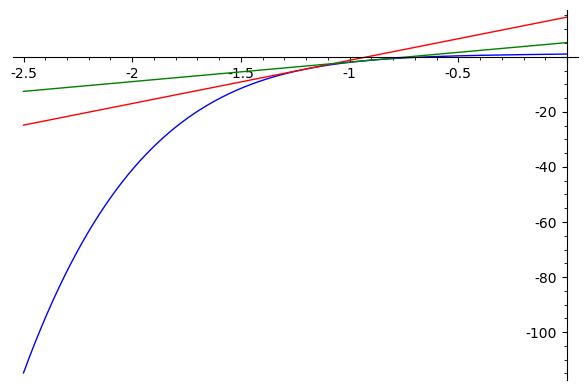

In [40]:
r = find_root(tanH, -2, 0)
tan2 = tangente(h, r)
p += plot(tan2, -2.5,0, color="green")
show(p)

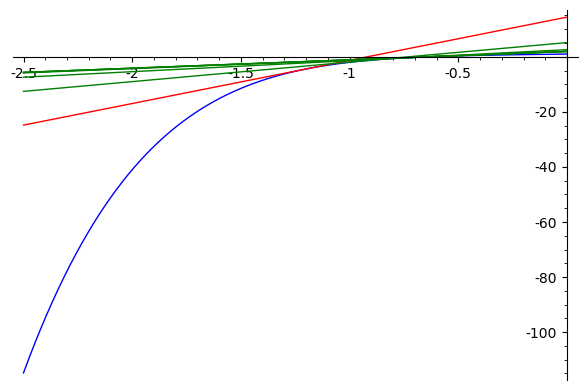

In [45]:
r = find_root(tan2, -2, 0)
tan2 = tangente(h, r)
p += plot(tan2, -2.5,0, color="green")
show(p)

### Question
1. Ecrire un programme qui applique la méthode de Newton pour renvoyer une racine d'une fonction dérivable étant donné la fonction, un point de départ et une précision.
1. Utiliser les fonctions $f'$ et $h$ avec différents points de départ pour trouver toutes les racines.
1. Ajouter un compteur de points calculés. Comparer cette méthode avec les deux précédentes sur la fonction $h$ en prenant comme départ $a=-1.2$ et $b=0$. Laquelle arrive à une précision donnée le plus rapidement?

In [82]:
def methodeNewton(func, pt, prec):
    tang = tangente(func, pt)
    r = tang.roots()[0][0]
    a = func(r)
    cpt = 1
    while abs(a) > prec:
        tang = tangente(func, r)
        r = tang.roots()[0][0]
        a = func(r)
        cpt += 1
    return (r, cpt)

In [89]:
a = methodeNewton(h, -1.2, 2**-23)
show(h(a[0].n()))
show(a[0])
a = methodeNewton(fD, -1.2, 2**-23)
show(fD(a[0].n()))
show(a[0])

-1.44884104713583e-14

-909842556855056690472536241483750033469773897737448563938866474073039794413249124714518981033675149835123003404805780620253011029157032761186294055933150085610556139597122675383594149662862429798298833717216268779454904972960603587992682305864715662838267586782901815994522117804545393109052465675873207711615669062758998196932215694427886105527719899127499089716174932330724994065048267937947554899093332888292418316428077609035518657171487326011252215830051595985623605781803227718093881431279955158306454703834197821361921071766904231153813910929232690823669318814672102454035719271097507854189334813394876129505301094889235767025325659773844172575982230007373628701364850451126687808911833488696375091214988884207283709651443584415203996474377875242989932490758002053791506702140697988223381318027361355828736070918045552970077666874954557622246554666262749736472670493770692883454881521984216848852553875291353899992132057999868014066430454587159586642603066938415893306935715150330015898297540692595317561955271607007031265564386446810080480041393454162652178714511515709887129360739658314121272123611138995339564992988571146968600357426663745418582067435973699923306318472794759227371225853624374825491474648376477239497860518164189440579086726701545230424221546039043237673770593771229728214642174273498222011574338530488147873381871805954472179799811359752788513404672691192034524534238798654956755172039397270592348369315511109905959866709948520483487985550114564048947783718020445178192645915215786001713481587638297730444136884999126016942416409439023467116529674941136460671635407723605830085086429359055197938261083727515064654065017828550861997408233825364512105124783907565081055880426960486196254786852550483454141278280264895739483067627600522816859563740189069790995644790906855842058556309567138446370808611762309666528253587755768656472698366749701355638209051764963846705072326529863071367544741787821713576038144663988283176205665714793103416982009284766935090145705407970191344063655552548300259877207820194237902671035824246869411667643954083321200507045847319886117634225498998518703757438646148258762762486932193019498692596294179819437980776782935910677738309323225767714238634081972255285994474737413558734433532220328797568753600683439165108655478893999999015752572328816873471724741982425869003002416078076326280191423085843377157869864853727934375252375672410245171083548951473711052228845404535894397100246594654587699923593426733041908119275404068715954129641165518254804316310970042331289173443185301308122225396575438668963249878485141524972560074260863344627570397186969704546755353486102903434227184567274301161421683775320440044019486581176895255966327126877891366321298328528735980804208636132509331896519350148823782401948188742710009229549012545689291542570434993426123339272188767797024313504690601897040485711726436994418495427718439120588978186834289575838421155302666793435529529945393395846765489554103315202308287857579277747040262337360661897175069570331300253516383855275580823069220541418326670824638412583377461441505135403896293966158890779802921981031920760188928479542470819169801823465045407227025750466333083765557514538517046169448895726513976010607762759029175365171145566645650314586971748707832256875401765157146702392017555553129391492325454976194073435260044676916339798111759215942774041623474801188983616580847660619526851551657889409648784645256237471793226690667691840190398311841637586550505313721620588673379978810842275137816243281614821244926615337610988880355225945515500581839175252314696855458109160569243533777242459521728220311958515590001569500465322152483589670727831348132675896737642582270401953042056467692427134540854892777196076282909718771245988082527669483913047280686490061795808291437956236332311920935884710837756626367332882850889865558835063183574536990686527465183987543184020350770253750284437141951807755627083208451363216232189832658784809969701935445496791733165106607731164912564156112306226620631923072

0.000000000000000

-2154911527749149722015188850049989268323752393272491754786401740354733925893215121013248696047435369351369049888661356277890318685918466829376280464032551619488265576544874380171696681230921019475168854792522800199326721591667107440462147037931852673574570968298749504207207761464620398717754682119030338691967119714147972859883595300446058076004405356897993000916802722512930685088985081120479793497188115181171930002439137312941914789930183655178699147952058546008511036579617667087755114532687188577276603430729067811903935297466271598627905312952178923268040436869599340984568676462828951601206326167962265972425221701891650866608929323353142645845900158619116661269627411256071600517671982828462072260497888346024635370770353977196891113497679252140038225848961041880728296995347224964209954534085763291626824260604882869778894230202335250705553033354199567064292403836307857231758792983833977016323081184024619710591972778268624919148828839477577630861019358854501951017515297733111035284152383513570742665136373096377128178728730421237958023718103082042713560863252109076248504425340991596316160044726213437682670914301605903805467963725245312415701280728939098440010012297919238573547119543305826370809700236759518629178096170144216640499034057861490358567091117544418451233209496270636118186329179412452832504494429423008928812645937946901599760125662698561309607020318463966474946259653065516960287948169682429637653419924819579989972726370906977246168089876364368422925320694222291062480524745967538152288204104520758190824646754016023127445345061178485257923589532506860318507017221810795092639377156039062214001370051776352518563105889038570956447297242183563075212928004869913129997642876619316233691009416103764147843423284326995483312053664196136132507605200437465446646082538321585995280000228769028675144664595395315521867620433122246345862895096640559795646202755349058766830610753395770123274074467035334564088930146072434111423858481947623373481185357731225560543472741967715906122922002199774168998839204000652142434427044133262792890707758894182150765217942298455957606639676379754406637587259661105700342642730288672678677019927119882164528854323488947616262961885457161526755043841168932638148509868941616668663802713882709802753480170293372967878770327655233580958543378257016909371654726095622586980727093795835662220833768214522770235045198603673867468333339649768771107872681397976232062760001230927696947657265126891517013016620275856641575574099697361834900682835636250683482570515102/2154911527749149523814262949625374497494238786800089849514073419221730345939777349799060949638994508961275760496660741479101139408008650112709769912698174938033599203766024796067542305787052572948020088295053082888873338215373786098038878248864501496843248274890931765024488914705365359182651982634046643865420876033054903602491316667128193774192693084835945112444445944909079911190941945434739780248717099602990443245296882990439721299004845299418906800720545699469256752004611212983340241836125641918807749956467407787847223851436006423565690290950122034350911012103797380689350418485931906228214909923191309132391855298926713134674919717877929931409050775423688322406800438540508831871245533034897595849708336529884044342010369463077950642675194383134520214419164958376707985279856346201093857393921057223574973038599797322615746123889636465357805525948156357447637257709429980903684131417276095305907894383471047028269725906330982905939345187302064440030181198041252022682260324110288638064173811777219118752118169096426918540499979782554914911790226907823372728532806711063673951676555387139727844254620373139959092966991730805056376792624218426476261795864725282798104165803904030836323736117242275878889862859665151055679585731838033206571676895206089106932188106919027128354492603463575464573725801475549755596462341656011245922904723105775011896048366455079255699385694090383126332107808664553093846950660617701592127718332587592675940497806033219441417795525418646673953818

In [92]:
a = faussePosition(h, -1.2, 0, 2**-23)
print("Méthode fausse position")
print(a[0], h(a[0]))
print("nb intervalles: ", a[1])
a =  dichoRacineIntervalle(h, -1.2, 0, 2**-23)
print("Méthode dichotomique")
print(a[0], h(a[0]))
print("nb intervalles: ", a[1])
a =  methodeNewton(h, -1.2, 2**-23)
print("Méthode de Newton")
print(a[0], h(a[0]).n())
print("nb intervalles: ", a[1])

Méthode fausse position
-0.6368828871783955 9.004037743176596e-08
nb intervalles:  35
Méthode dichotomique
-0.636882948875427 -9.74875571102540e-8
nb intervalles:  24
Méthode de Newton
-9098425568550566904725362414837500334697738977374485639388664740730397944132491247145189810336751498351230034048057806202530110291570327611862940559331500856105561395971226753835941496628624297982988337172162687794549049729606035879926823058647156628382675867829018159945221178045453931090524656758732077116156690627589981969322156944278861055277198991274990897161749323307249940650482679379475548990933328882924183164280776090355186571714873260112522158300515959856236057818032277180938814312799551583064547038341978213619210717669042311538139109292326908236693188146721024540357192710975078541893348133948761295053010948892357670253256597738441725759822300073736287013648504511266878089118334886963750912149888842072837096514435844152039964743778752429899324907580020537915067021406979882233813180273613558287360